In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rc("font", size = 18)

In [10]:
houses = pd.read_csv("1.4_houses.csv")

In [12]:
houses.head(7)

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0
5,5,8,basic,200.0
6,27,29,luxury,2108.0


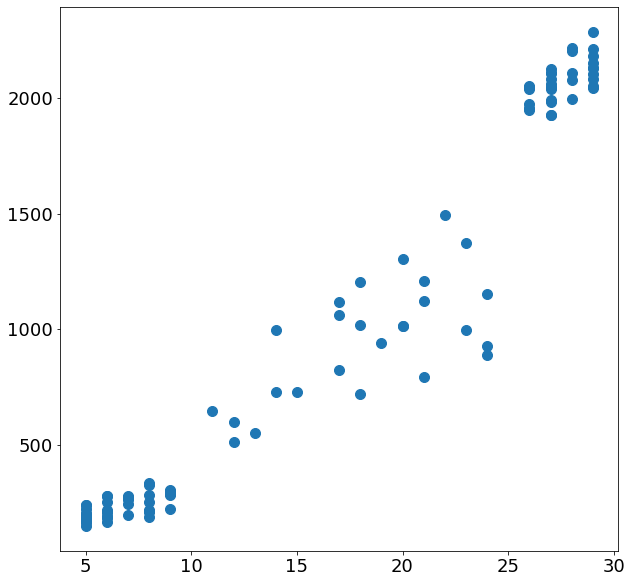

In [29]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes()

# помещает токи на график
ax.scatter(houses["dim_1"], houses["price"], s = 100)
plt.show()

In [28]:
# price = f(x) = a*x + b 
# a * dim_1 + b | a + b * dim_1

In [18]:
# импортируем модуль, отвечающий за линейную регрессию
from sklearn.linear_model import LinearRegression

In [23]:
# Выгружаем признаки и целевые значения в отдельные переменные
X = houses[["dim_1"]]
Y = houses["price"]

reg = LinearRegression().fit(X,Y)

In [27]:
reg.coef_, reg.intercept_

(array([83.08870109]), -351.68469784672334)

In [36]:
# Вытаскиваем нужные коэффициенты
[b] = reg.coef_
a = reg.intercept_

# создаем функцию предсказывающую цену на дом
# смотрим что происходит под капотом
def reg_prediction(dim_1):
    return a + b* dim_1

In [37]:
reg_prediction(X.dim_1[0])

2057.887633711507

In [56]:
# встроеный метод для расчета предсказания
reg.predict(X[0:1])[0], reg_prediction(X.dim_1.max())

(2057.887633711507, 2057.887633711507)

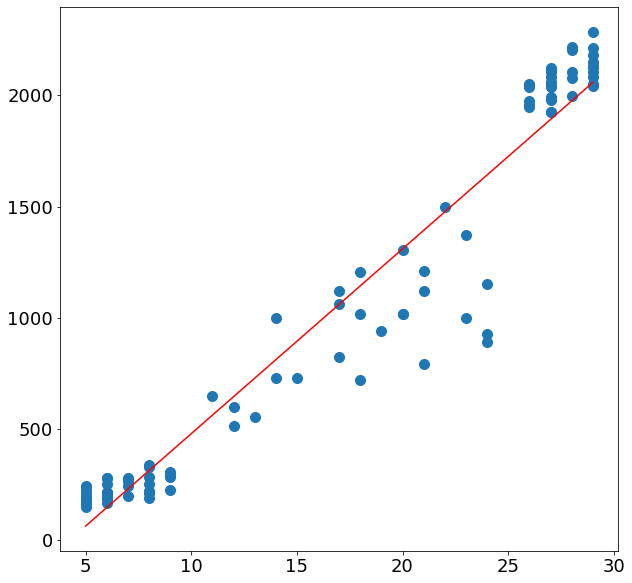

In [58]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes()
ax.scatter(houses["dim_1"], houses["price"], s = 100)
ax.plot([X.dim_1.min(), X.dim_1.max()],\
       [reg_prediction(X.dim_1.min()), reg_prediction(X.dim_1.max())],\
        c = "red")
plt.show()

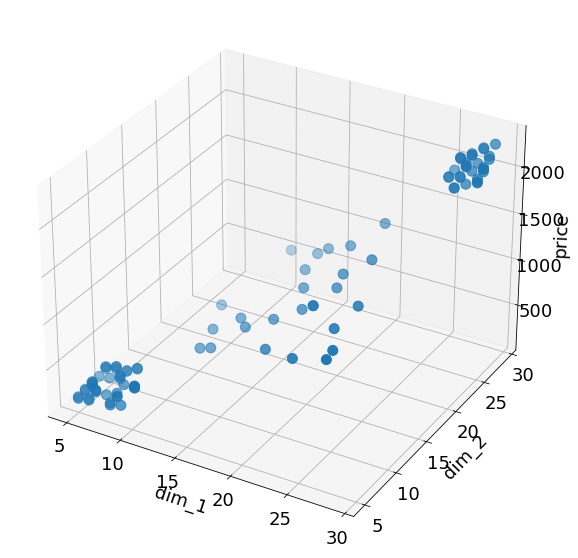

In [66]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection = "3d")
ax.scatter(houses["dim_1"],houses["dim_2"], houses["price"], s = 100)
ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_zlabel("price")
plt.show()

In [18]:
# импортируем модуль, отвечающий за линейную регрессию
from sklearn.linear_model import LinearRegression

In [68]:
# Выгружаем признаки и целевые значения в отдельные переменные
X = houses[["dim_1","dim_2"]]
Y = houses["price"]

reg = LinearRegression().fit(X,Y)

In [74]:
reg.coef_, reg.intercept_

(array([34.38095466, 53.54529546]), -415.49236636492174)

In [73]:
# Вытаскиваем нужные коэффициенты
[b1,b2] = reg.coef_
a = reg.intercept_

# создаем функцию предсказывающую цену на дом
# смотрим что происходит под капотом
def reg_prediction(dim_1, dim_2):
    return a + b1* dim_1 + b2 * dim_2

In [77]:
d1, d2 = list(), list()
for x in np.linspace(min(houses["dim_1"]), max(houses["dim_1"]), 100):
    for y in np.linspace(min(houses["dim_2"]), max(houses["dim_2"]), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1,1)
d2 = np.array(d2).reshape(-1,1)
p = reg.predict(np.concatenate([d1,d2],axis = 1))

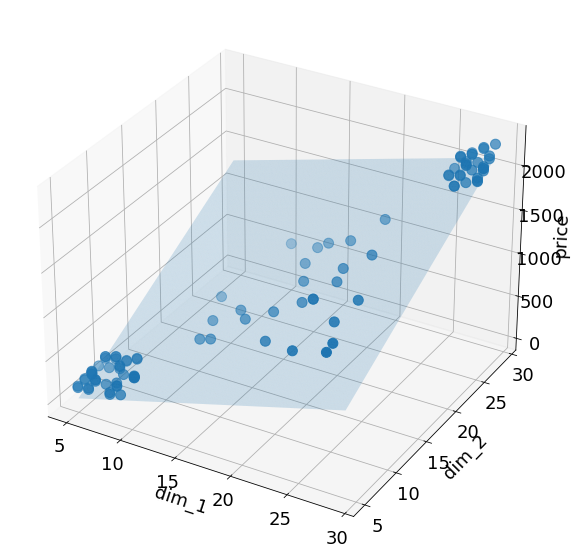

In [78]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection = "3d")
ax.scatter(houses["dim_1"],houses["dim_2"], houses["price"], s = 100)

ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha = 0.2)

ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_zlabel("price")
plt.show()